In [1]:
#imports go here
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to /Users/shionguha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Printing the first 100 characters of each of the files
for fileid in gutenberg.fileids():
    print(fileid, gutenberg.raw(fileid)[:100], '...')

austen-emma.txt [Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a ...
austen-persuasion.txt [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire ...
austen-sense.txt [Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settle ...
bible-kjv.txt [The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called  ...
blake-poems.txt [Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS  ...
bryant-stories.txt [Stories to Tell to Children by Sara Cone Bryant 1918] 


TWO LITTLE RIDDLES IN RHYME


     T ...
burgess-busterbrown.txt [The Adventures of Buster Bear by Thornton W. Burgess 1920]

I

BUSTER BEAR GOES FISHING


Bu ...
carroll-alice.txt [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was ...
chesterton-ball.txt [The Ba

In [3]:
sample_data = ["Today is 20th September. I am in Toronto, Ontario for INF2209. Currently I am " \
                "attending a Natural Language Processing tutorial."]
sample_data

['Today is 20th September. I am in Toronto, Ontario for INF2209. Currently I am attending a Natural Language Processing tutorial.']

In [4]:
from nltk.tokenize import sent_tokenize

def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('Sentence tokens:', sentences)
    return sentences

In [5]:
sample_sentences = get_sent_tokens(sample_data)

Sentence tokens: ['Today is 20th September.', 'I am in Toronto, Ontario for INF2209.', 'Currently I am attending a Natural Language Processing tutorial.']


In [6]:
from nltk.tokenize import word_tokenize

def get_word_tokens(sentences):
    '''Word tokenization'''
    words = []
    for sent in sentences:
        words.extend(word_tokenize(sent))
    print('Word tokens:', words)
    return(words)

In [7]:
sample_words = get_word_tokens(sample_sentences)

Word tokens: ['Today', 'is', '20th', 'September', '.', 'I', 'am', 'in', 'Toronto', ',', 'Ontario', 'for', 'INF2209', '.', 'Currently', 'I', 'am', 'attending', 'a', 'Natural', 'Language', 'Processing', 'tutorial', '.']


In [8]:
import matplotlib
from nltk.probability import FreqDist
matplotlib.use('TkAgg') 

def plot_freq_dist(words, num_words = 20):
    '''Frequency distribution'''
    fdist = FreqDist(words)
    fdist.plot(num_words, cumulative=False)

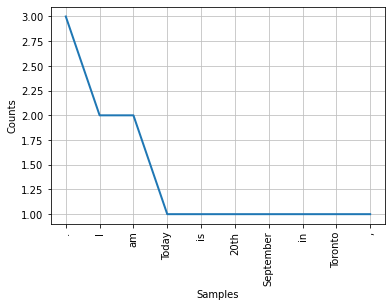

In [9]:
%matplotlib inline
plot_freq_dist(sample_words, num_words=10)

In [10]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_clean_sentences(sentences, remove_digits=False):
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent)
        clean_text = clean_text.lower()
        clean_sentences.append(clean_text)
    print('Clean sentences:', clean_sentences)
    return clean_sentences

def filter_stopwords(words):
    '''Removing stopwords from given words'''
    filtered_words = [w for w in words if w not in stop_words]
    print('Filtered words:', filtered_words)
    return filtered_words

In [11]:
sample_sentences = get_clean_sentences(sample_sentences, remove_digits = True)
sample_words = get_word_tokens(sample_sentences)
sample_words = filter_stopwords(sample_words)

Clean sentences: ['today is th september', 'i am in toronto ontario for inf', 'currently i am attending a natural language processing tutorial']
Word tokens: ['today', 'is', 'th', 'september', 'i', 'am', 'in', 'toronto', 'ontario', 'for', 'inf', 'currently', 'i', 'am', 'attending', 'a', 'natural', 'language', 'processing', 'tutorial']
Filtered words: ['today', 'th', 'september', 'toronto', 'ontario', 'inf', 'currently', 'attending', 'natural', 'language', 'processing', 'tutorial']


In [12]:
nltk.download('averaged_perceptron_tagger')

def get_pos_tags(words):
    '''Get the part of speech (POS) tags for the words'''
    tags=[]
    for word in words:
        tags.append(nltk.pos_tag([word]))
#     print(tags)
    return tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
sample_tags = get_pos_tags(sample_words)
sample_tags

[[('today', 'NN')],
 [('th', 'NN')],
 [('september', 'NN')],
 [('toronto', 'NN')],
 [('ontario', 'NN')],
 [('inf', 'NN')],
 [('currently', 'RB')],
 [('attending', 'VBG')],
 [('natural', 'JJ')],
 [('language', 'NN')],
 [('processing', 'NN')],
 [('tutorial', 'NN')]]

In [14]:
#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_lemma(word_tags):
    '''Reduce the words to their base word (lemma) by using a lexicon'''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, # Mapping NLTK POS tags to WordNet POS tags
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    print(lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shionguha/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [15]:
sample_lemma = get_lemma(sample_tags)

['today', 'th', 'september', 'toronto', 'ontario', 'inf', 'currently', 'attend', 'natural', 'language', 'processing', 'tutorial']


In [16]:
#tf-idf
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    ''''''
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 

In [17]:
get_bag_of_words(sample_data)

[[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'today': 13, 'is': 7, '20th': 0, 'september': 12, 'am': 1, 'in': 5, 'toronto': 14, 'ontario': 10, 'for': 4, 'inf2209': 6, 'currently': 3, 'attending': 2, 'natural': 9, 'language': 8, 'processing': 11, 'tutorial': 15}


In [18]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
print('Classes present:', news.target_names)
print('Number of classes present:', len(news.target_names))
print('Number of data points:', len(news.data))

Classes present: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of classes present: 20
Number of data points: 18846


In [19]:
# Printing the first few characters for each category

for text, num_label in zip(news.data[:10], news.target[:10]):
    print('[%s]:\t\t "%s ..."' % (news.target_names[num_label], text[:100].split('\n')[0]))

[rec.sport.hockey]:		 "From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> ..."
[comp.sys.ibm.pc.hardware]:		 "From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson) ..."
[talk.politics.mideast]:		 "From: hilmi-er@dsv.su.se (Hilmi Eren) ..."
[comp.sys.ibm.pc.hardware]:		 "From: guyd@austin.ibm.com (Guy Dawson) ..."
[comp.sys.mac.hardware]:		 "From: Alexander Samuel McDiarmid <am2o+@andrew.cmu.edu> ..."
[sci.electronics]:		 "From: tell@cs.unc.edu (Stephen Tell) ..."
[comp.sys.mac.hardware]:		 "From: lpa8921@tamuts.tamu.edu (Louis Paul Adams) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[rec.sport.hockey]:		 "From: dchhabra@stpl.ists.ca (Deepak Chhabra) ..."
[talk.religion.misc]:		 "From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) ..."


In [20]:
#machine learning
from sklearn.model_selection import train_test_split
 
def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
 
    classifier.fit(X_train, y_train)
    print("Accuracy:", classifier.score(X_test, y_test))
    return classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
model_1 = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])

In [22]:
print('Results for TF-IDF as feature:')
train(model_1, news.data, news.target)

Results for TF-IDF as feature:
Accuracy: 0.8463497453310697


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [23]:
model_2 = Pipeline([('vectorizer', TfidfVectorizer(use_idf=False)),
                    ('classifier', MultinomialNB())])

In [24]:
print('Results for TF as feature, removing IDF')
train(model_2, news.data, news.target)

Results for TF as feature, removing IDF
Accuracy: 0.756578947368421


Pipeline(steps=[('vectorizer', TfidfVectorizer(use_idf=False)),
                ('classifier', MultinomialNB())])